# WeatherPy

---

## Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generating the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Creating Plots to Showcase the Relationship Between Weather Variables and Latitude

### Using the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_requests = requests.get(city_url)
        city_weather = city_weather_requests.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | san quintin
Processing Record 6 of Set 1 | vigrestad
Processing Record 7 of Set 1 | adrar
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | zhangye
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | solone
Processing Record 14 of Set 1 | marzuq
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | talaya
Processing Record 17 of Set 1 | vardo
Processing Record 18 of Set 1 | san cristobal
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | carlisle
Processing Record 23 of

Processing Record 34 of Set 4 | pochutla
Processing Record 35 of Set 4 | kalemie
Processing Record 36 of Set 4 | bayanday
Processing Record 37 of Set 4 | comodoro rivadavia
Processing Record 38 of Set 4 | laela
Processing Record 39 of Set 4 | haibowan
City not found. Skipping...
Processing Record 40 of Set 4 | wanning
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | watsa
Processing Record 43 of Set 4 | batagay-alyta
Processing Record 44 of Set 4 | esperance
Processing Record 45 of Set 4 | sladkovo
Processing Record 46 of Set 4 | lixourion
Processing Record 47 of Set 4 | najran
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | rameswaram
Processing Record 0 of Set 5 | phan rang
City not found. Skipping...
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | nieuw amsterdam
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | geresk
City not found. Skipping...
Processing Record 5 of Set 5 | shache
Processing 

Processing Record 25 of Set 8 | pechory
Processing Record 26 of Set 8 | yerbogachen
Processing Record 27 of Set 8 | samoded
Processing Record 28 of Set 8 | pasni
Processing Record 29 of Set 8 | conde
Processing Record 30 of Set 8 | krasnoselkup
Processing Record 31 of Set 8 | pekan
Processing Record 32 of Set 8 | rensvik
Processing Record 33 of Set 8 | gazanjyk
Processing Record 34 of Set 8 | pringsewu
Processing Record 35 of Set 8 | bonavista
Processing Record 36 of Set 8 | lucea
Processing Record 37 of Set 8 | turbat
Processing Record 38 of Set 8 | faanui
Processing Record 39 of Set 8 | kyra
Processing Record 40 of Set 8 | saint-joseph
Processing Record 41 of Set 8 | kupang
Processing Record 42 of Set 8 | apt
Processing Record 43 of Set 8 | tilichiki
Processing Record 44 of Set 8 | superior
Processing Record 45 of Set 8 | dogondoutchi
Processing Record 46 of Set 8 | inirida
Processing Record 47 of Set 8 | kuche
City not found. Skipping...
Processing Record 48 of Set 8 | akalkot
Proce

Processing Record 14 of Set 12 | soderhamn
Processing Record 15 of Set 12 | thunder bay
Processing Record 16 of Set 12 | bom jesus
Processing Record 17 of Set 12 | betioky
Processing Record 18 of Set 12 | palora
Processing Record 19 of Set 12 | akdepe
Processing Record 20 of Set 12 | ilhabela
Processing Record 21 of Set 12 | ponta delgada
Processing Record 22 of Set 12 | tyrma
Processing Record 23 of Set 12 | olinda
Processing Record 24 of Set 12 | birin
Processing Record 25 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 26 of Set 12 | dong hoi
Processing Record 27 of Set 12 | west des moines
Processing Record 28 of Set 12 | windhoek
Processing Record 29 of Set 12 | kotido
Processing Record 30 of Set 12 | road town
Processing Record 31 of Set 12 | khandyga
Processing Record 32 of Set 12 | morrope
Processing Record 33 of Set 12 | delano
Processing Record 34 of Set 12 | ayagoz
Processing Record 35 of Set 12 | pinega
Processing Record 36 of Set 12 | ajdab

In [5]:
# Converting the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Showing Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [6]:
# Displays sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alofi,-19.0595,-169.9187,26.88,82,100,7.21,NU,1678837414
1,anadyr,64.7500,177.4833,-19.72,77,0,4.00,RU,1678837415
2,new norfolk,-42.7826,147.0587,21.07,49,93,2.24,AU,1678837416
3,bredasdorp,-34.5322,20.0403,20.63,95,68,3.38,ZA,1678837416
4,san quintin,30.4833,-115.9500,17.86,68,85,4.60,MX,1678837219


In [8]:
# Exports the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Reads saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alofi,-19.0595,-169.9187,26.88,82,100,7.21,NU,1678837414
1,anadyr,64.7500,177.4833,-19.72,77,0,4.00,RU,1678837415
2,new norfolk,-42.7826,147.0587,21.07,49,93,2.24,AU,1678837416
3,bredasdorp,-34.5322,20.0403,20.63,95,68,3.38,ZA,1678837416
4,san quintin,30.4833,-115.9500,17.86,68,85,4.60,MX,1678837219


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [18]:
# variable short cut
x_axis = city_data_df['Lat']

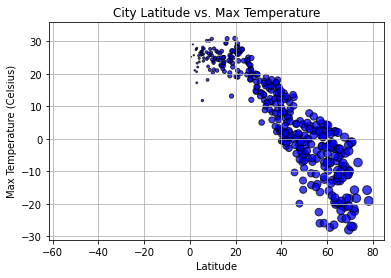

In [20]:
# scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

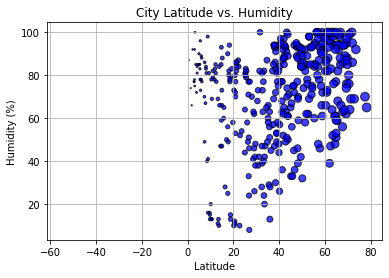

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x_axis, city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

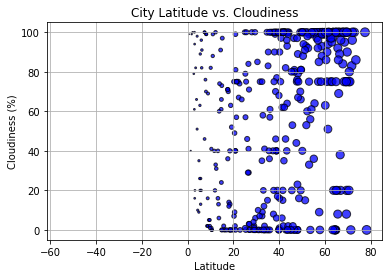

In [23]:
# scatter plots for latitude vs. cloudiness
plt.scatter(x_axis, city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

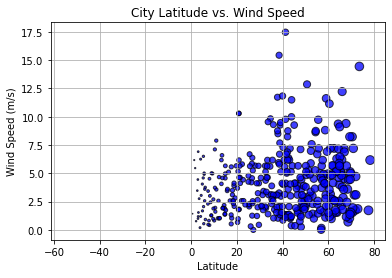

In [24]:
# scatter plots for latitude vs. wind speed
plt.scatter(x_axis, city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",
            s=city_data_df['Lat'], alpha=0.75)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


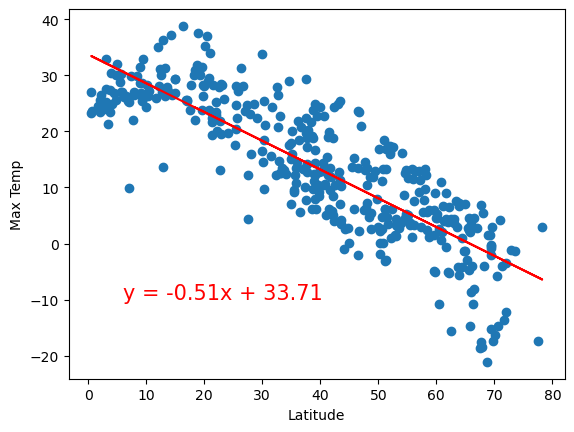

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


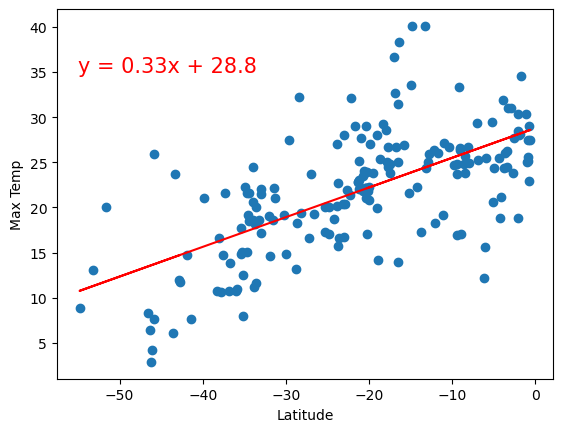

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


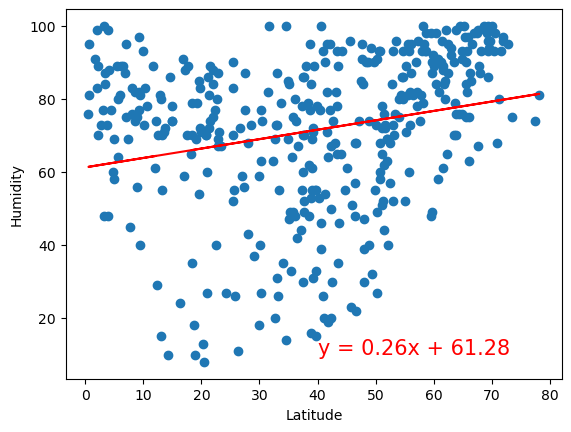

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


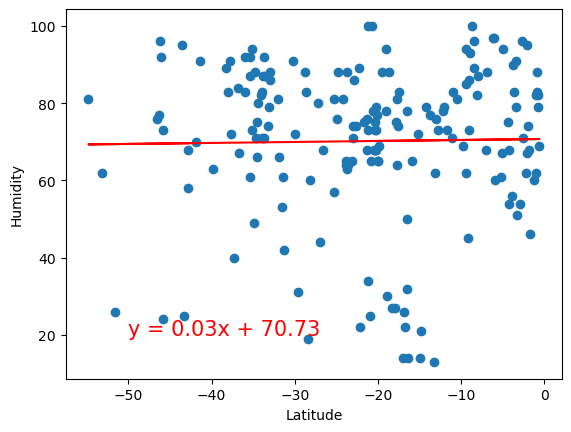

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


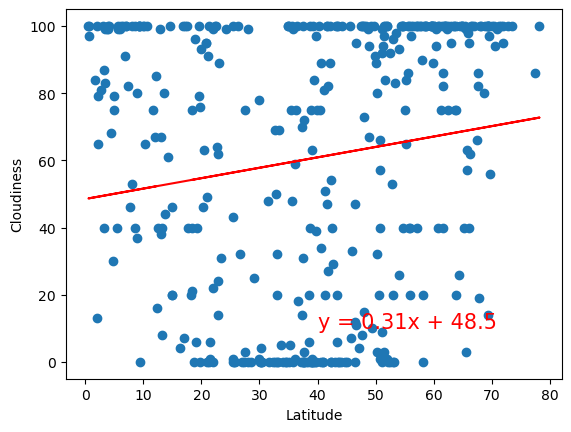

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


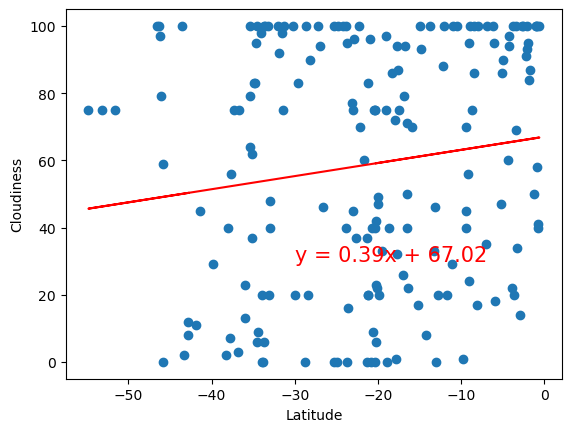

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


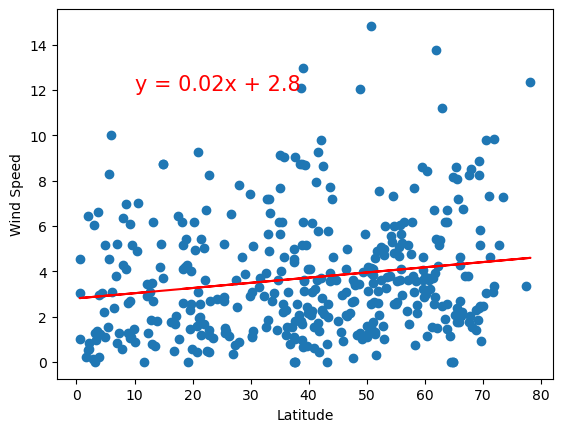

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


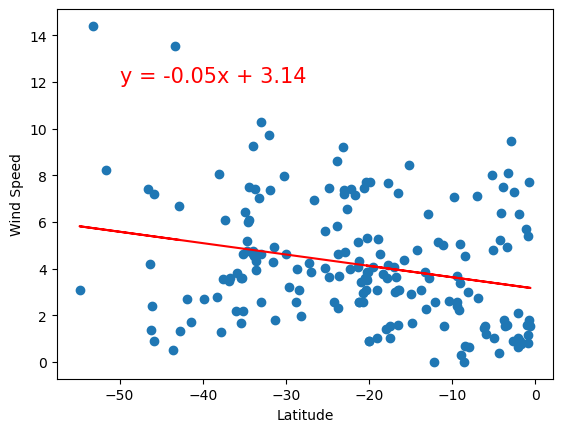

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE